In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
from openpyxl import load_workbook

In [3]:
wb = load_workbook("marin.xlsx")
ws = wb['Sheet1']
g = ws.rows
cells = next(g)
keys = [cell.value for cell in cells]
raw_data = []
for row in g:
    raw_data.append({ key : cell.value for key, cell in zip(keys, row)})
df = pd.DataFrame(raw_data)
a = [i for i in range(1990,2016)]
a.extend(["code", "country", "iso"])
df.columns = a
li = [i for i in range(1990,2016)]
li.insert(0, 'country')
li.insert(0, 'iso')
li.insert(0, 'code')
df = df[li]
df.head()

,code,iso,country,1990,1991,1992,1993,1994,1995,1996,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,4,AFG,Afghanistan,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,...,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000
1,8,ALB,Albania,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3830,...,0.8138,0.8138,0.8138,0.8138,0.8138,0.8138,0.8138,0.8138,0.8138,0.8138
2,12,DZA,Algeria,0.0175,0.0175,0.0175,0.0175,0.0175,0.0175,0.0175,...,0.0376,0.0376,0.0376,0.0376,0.0376,0.0376,0.0381,0.0381,0.0381,0.0381
3,16,ASM,American Samoa,8.6824,8.6824,8.6824,8.6824,8.6824,8.6824,8.6824,...,8.6824,8.6824,8.6824,8.6824,8.6840,8.6840,8.6840,8.6840,8.6840,8.6840
4,20,AND,Andorra,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,...,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000


In [4]:
wb = load_workbook("worldbank.xlsx")
ws = wb.active
g = ws.rows
cells = next(g)
keys = [cell.value for cell in cells]
raw_data = []
for row in g:
    raw_data.append({ key : cell.value for key, cell in zip(keys, row)})
bank = pd.DataFrame(raw_data)
bank.head()

,Code,Economy,Income group,Region
0,AFG,Afghanistan,Low income,South Asia
1,ALB,Albania,Upper middle income,Europe & Central Asia
2,DZA,Algeria,Upper middle income,Middle East & North Africa
3,ASM,American Samoa,Upper middle income,East Asia & Pacific
4,AND,Andorra,High income,Europe & Central Asia


In [5]:
mpa = pd.merge(df, bank[['Code','Income group', 'Region']], left_on = 'iso', right_on = 'Code')

In [6]:
mismatching_country = set(df.country) - set(mpa.country)
len(mismatching_country), np.array(mismatching_country)

(18,
 array({'Svalbard and Jan Mayen Islands', 'Holy See', 'Saint Helena', 'Niue', 'Montserrat', 'Tokelau', 'Martinique', 'Reunion', 'Falkland Islands', 'Anguilla', 'Mayotte', 'Norfolk Island', 'French Guiana', 'Saint Pierre and Miquelon', 'Guadeloupe', 'Cook Islands', 'Pitcairn', 'Wallis and Futuna'},
       dtype=object))

In [7]:
mpa.head(n=2)

,code,iso,country,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,Code,Income group,Region
0,4,AFG,Afghanistan,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.000,...,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,AFG,Low income,South Asia
1,8,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.383,...,0.8138,0.8138,0.8138,0.8138,0.8138,0.8138,0.8138,ALB,Upper middle income,Europe & Central Asia


In [8]:
except_9999 = mpa[mpa[mpa.columns[3:]].mean(axis=1) < -5000]
except_9999_list = except_9999.country.values

In [9]:
len(except_9999_list), except_9999_list

(47, array(['Afghanistan', 'Andorra', 'Armenia', 'Aruba', 'Austria', 'Belarus',
        'Bhutan', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi',
        'Central African Republic', 'Chad', 'Curacao', 'Czech Republic',
        'Ethiopia', 'Guam', 'Hong Kong', 'Hungary', 'Isle of Man',
        'Kyrgyz Republic', 'Laos', 'Lesotho', 'Liechtenstein',
        'Luxembourg', 'Macao', 'Macedonia', 'Malawi', 'Mali', 'Moldova',
        'Mongolia', 'Nepal', 'Niger', 'Paraguay', 'Rwanda', 'San Marino',
        'Serbia', 'Slovakia', 'South Sudan', 'Palestine', 'Swaziland',
        'Switzerland', 'Tajikistan', 'Uganda', 'Uzbekistan', 'Zambia',
        'Zimbabwe'], dtype=object))

In [10]:
mpa = mpa[mpa[mpa.columns[3:]].mean(axis=1) > -5000]

In [11]:
import sys
ep = sys.float_info.epsilon

In [12]:
except_0 = mpa[mpa[mpa.columns[3:]].mean(axis=1) < ep]
except_0_list = except_0.country.values

In [13]:
len(except_0_list), except_0_list

(17, array(['Azerbaijan', 'Benin', 'Bosnia and Herzegovina', 'Cape Verde',
        'Cyprus', 'Eritrea', 'The Gambia', 'Guyana', 'Haiti', 'Iraq',
        'Kazakhstan', 'Montenegro', 'Nauru', 'North Korea', 'Somalia',
        'Togo', 'Turkmenistan'], dtype=object))

In [14]:
mpa = mpa[mpa[mpa.columns[3:]].mean(axis=1) > ep]

In [15]:
len(mpa)

151

In [16]:
import convergence

In [17]:
ca = convergence.ConvergenceAnalysis(mpa)

Version 1.0.0
Welcome. This Class works for ConvergenceAnalysis.
You can access dataframe by these METHODS
  : df, t_df
also, You can access as pd.Series by these METHODS
  : mean, var, std, cv, sigma, std_s, cv_s (_s means, "sample")
    rank_var, gamma_var, gamma
and You can access as pd.DataFrame by thes METHODS
  : df_rank, df_gamma
Finally, You can get three CAGR by these METHODS
  : mean_cagr, sigma_cagr, gamma_cagr

This Class has 4 Functions following as
  : t_test(alpha=0.05, r=0), chi_square_test(r=0)
    get_measure_table(name, measure), get_index_table(name)


In [18]:
mpa2 = mpa[mpa[mpa.columns[3:]].mean(axis=1) > 0.1]
mpa3 = mpa[mpa[mpa.columns[3:]].mean(axis=1) > 0.5]
tdf = pd.read_csv("marine.csv")
lie = li[3:]
lie.insert(0, "country")
tdf.columns = lie

In [19]:
tdf = pd.read_csv("101.csv")
lie = li[3:]
lie.insert(0, "country")
tdf.columns = lie
ca4 = convergence.ConvergenceAnalysis(tdf)

Version 1.0.0
Welcome. This Class works for ConvergenceAnalysis.
You can access dataframe by these METHODS
  : df, t_df
also, You can access as pd.Series by these METHODS
  : mean, var, std, cv, sigma, std_s, cv_s (_s means, "sample")
    rank_var, gamma_var, gamma
and You can access as pd.DataFrame by thes METHODS
  : df_rank, df_gamma
Finally, You can get three CAGR by these METHODS
  : mean_cagr, sigma_cagr, gamma_cagr

This Class has 4 Functions following as
  : t_test(alpha=0.05, r=0), chi_square_test(r=0)
    get_measure_table(name, measure), get_index_table(name)


In [20]:
ca1 = convergence.ConvergenceAnalysis(mpa2)
ca2 = convergence.ConvergenceAnalysis(mpa3)
ca3 = convergence.ConvergenceAnalysis(tdf)

Version 1.0.0
Welcome. This Class works for ConvergenceAnalysis.
You can access dataframe by these METHODS
  : df, t_df
also, You can access as pd.Series by these METHODS
  : mean, var, std, cv, sigma, std_s, cv_s (_s means, "sample")
    rank_var, gamma_var, gamma
and You can access as pd.DataFrame by thes METHODS
  : df_rank, df_gamma
Finally, You can get three CAGR by these METHODS
  : mean_cagr, sigma_cagr, gamma_cagr

This Class has 4 Functions following as
  : t_test(alpha=0.05, r=0), chi_square_test(r=0)
    get_measure_table(name, measure), get_index_table(name)
Version 1.0.0
Welcome. This Class works for ConvergenceAnalysis.
You can access dataframe by these METHODS
  : df, t_df
also, You can access as pd.Series by these METHODS
  : mean, var, std, cv, sigma, std_s, cv_s (_s means, "sample")
    rank_var, gamma_var, gamma
and You can access as pd.DataFrame by thes METHODS
  : df_rank, df_gamma
Finally, You can get three CAGR by these METHODS
  : mean_cagr, sigma_cagr, gamma_ca

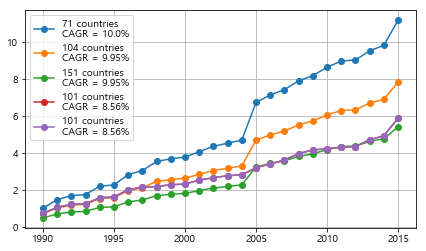

In [21]:
pd.concat((ca2.mean, ca1.mean, ca.mean, ca3.mean, ca4.mean),axis=1, 
          keys=["{} countries\nCAGR = {}%".format(ca2.dof+1, round(ca2.mean_cagr*100,2)),
                "{} countries\nCAGR = {}%".format(ca1.dof+1, round(ca1.mean_cagr*100,2)),
                "{} countries\nCAGR = {}%".format(ca.dof+1, round(ca.mean_cagr*100,2)),
                "{} countries\nCAGR = {}%".format(ca3.dof+1, round(ca3.mean_cagr*100,2)),
                "{} countries\nCAGR = {}%".format(ca4.dof+1, round(ca4.mean_cagr*100,2))]).plot(
    figsize=(7,4), grid=True, marker="o")

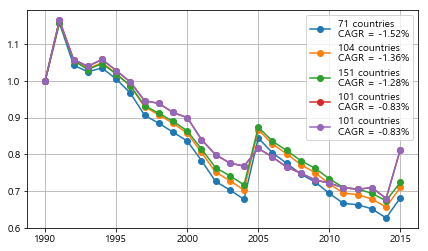

In [22]:
pd.concat((ca2.sigma, ca1.sigma, ca.sigma, ca3.sigma, ca4.sigma),axis=1, 
          keys=["{} countries\nCAGR = {}%".format(ca2.dof+1, round(ca2.sigma_cagr*100,2)),
                "{} countries\nCAGR = {}%".format(ca1.dof+1, round(ca1.sigma_cagr*100,2)),
                "{} countries\nCAGR = {}%".format(ca.dof+1, round(ca.sigma_cagr*100,2)),
                "{} countries\nCAGR = {}%".format(ca3.dof+1, round(ca3.sigma_cagr*100,2)),
                "{} countries\nCAGR = {}%".format(ca4.dof+1, round(ca4.sigma_cagr*100,2))]).plot(
    figsize=(7,4), grid=True, marker="o")

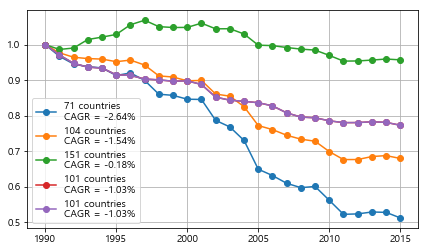

In [23]:
pd.concat((ca2.gamma, ca1.gamma, ca.gamma, ca3.gamma, ca4.gamma),axis=1, 
          keys=["{} countries\nCAGR = {}%".format(ca2.dof+1, round(ca2.gamma_cagr*100,2)),
                "{} countries\nCAGR = {}%".format(ca1.dof+1, round(ca1.gamma_cagr*100,2)),
                "{} countries\nCAGR = {}%".format(ca.dof+1, round(ca.gamma_cagr*100,2)),
                "{} countries\nCAGR = {}%".format(ca3.dof+1, round(ca3.gamma_cagr*100,2)),
                "{} countries\nCAGR = {}%".format(ca4.dof+1, round(ca4.gamma_cagr*100,2))]).plot(
    figsize=(7,4), grid=True, marker="o")

In [24]:
df_88 = pd.read_csv("marine.csv")
df_101 = pd.read_csv("101.csv")
df_104 = mpa2.copy()

In [38]:
len(set(df_101.country) - set(df_88.country))

13

In [39]:
len(set(df_104.country) - set(df_88.country))

36

In [40]:
len(set(df_104.country) - set(df_101.country))

24

In [46]:
set(mpa.country) - set(df_104.country)

{'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Barbados',
 'Bermuda',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Cambodia',
 'Cayman Islands',
 'Comoros',
 "Cote d'Ivoire",
 'Djibouti',
 'Dominica',
 'Faeroe Islands',
 'French Polynesia',
 'Ghana',
 'Grenada',
 'Iceland',
 'Israel',
 'Kuwait',
 'Lebanon',
 'Liberia',
 'Libya',
 'Maldives',
 'Malta',
 'Mauritius',
 'Micronesia',
 'Morocco',
 'Myanmar',
 'Nigeria',
 'Oman',
 'Qatar',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Martin',
 'Samoa',
 'Sao Tome and Principe',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'Sudan',
 'Trinidad and Tobago',
 'Turkey',
 'Turks and Caicos Islands',
 'Tuvalu',
 'Vanuatu'}

In [50]:
df_104.to_csv("df_104.csv", index = False)